---
# Implementing a CNN in TensorFlow Keras for CIFAR10 Dataset

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

In [2]:
SEED_VALUE = 42

# Fix seed to make training deterministic.
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

---
## 1. Load and View - CIFAR-10 Dataset

The CIFAR-10 dataset consists of 60,000 color images from 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.

<img src='https://learnopencv.com/wp-content/uploads/2023/01/tensorflow-keras-cifar10-classes.png' width=1000 align='center'>

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape)
print(X_test.shape)

170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


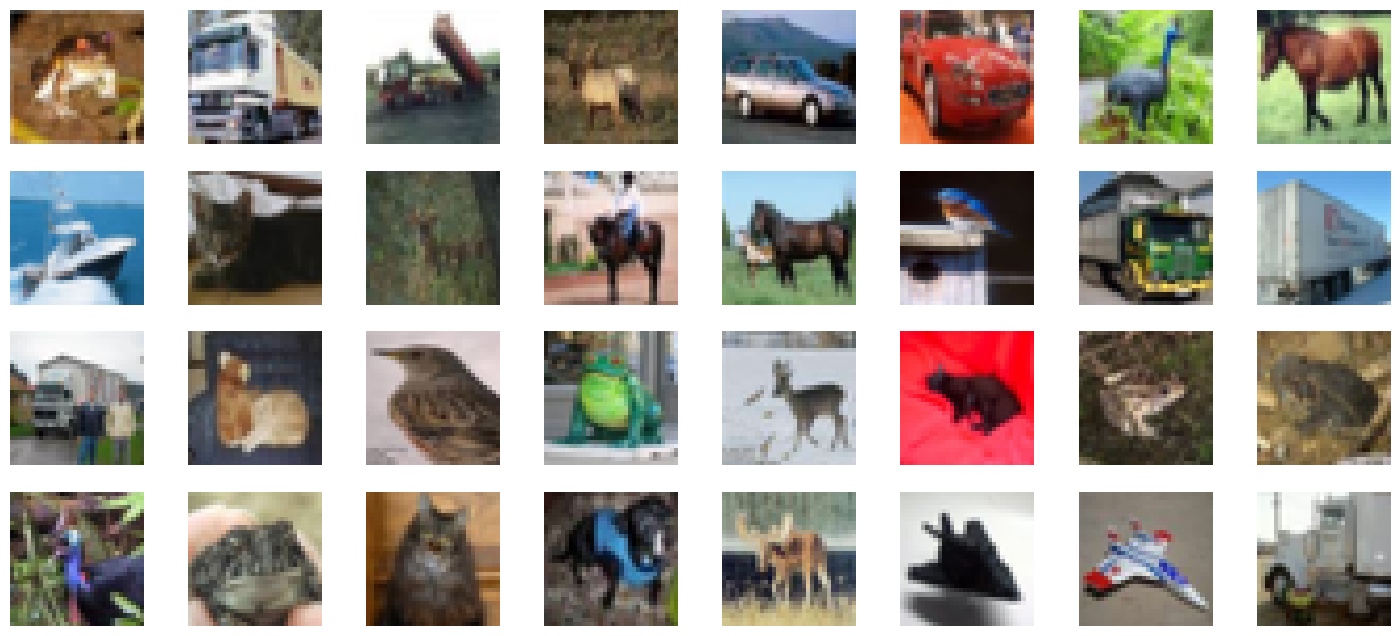

In [4]:
# Display Sample Images from the Dataset

plt.figure(figsize=(18, 8))

num_rows = 4
num_cols = 8

for i in range(num_rows * num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_train[i, :, :])
    plt.axis("off")

---
## 2. Dataset Preprocessing

In [5]:
# Normalize images to the range [0, 1].
X_train = X_train.astype("float32") / 255
X_test  = X_test.astype("float32")  / 255

In [6]:
# Change the labels from integer to categorical data.
print('Original (integer) label for the first training sample: ', y_train[0])

Original (integer) label for the first training sample:  [6]


In [7]:
# Convert labels to one-hot encoding.
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

In [8]:
print('After conversion to categorical one-hot encoded labels: ', y_train[0])

After conversion to categorical one-hot encoded labels:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


---
## 3. CNN Model Implementation in Keras

<img src='https://learnopencv.com/wp-content/uploads/2023/01/tensorflow-keras-cnn-architecture.png' width=950 align='center'>

### 3.1 Dataset and Training Configuration Parameters

In [16]:
@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES:  int = 10
    IMG_HEIGHT:   int = 32
    IMG_WIDTH:    int = 32
    NUM_CHANNELS: int = 3

@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS:        int = 31
    BATCH_SIZE:    int = 256
    LEARNING_RATE: float = 0.001

### 3.2 Define the Convolutional Blocks

In [10]:
def cnn_model(input_shape=(32, 32, 3)):

    model = Sequential()

    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #------------------------------------
    # Conv Block 3: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #------------------------------------
    # Flatten the convolutional features.
    #------------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

### 3.3 Define the Classifier

<img src='https://learnopencv.com/wp-content/uploads/2023/01/tensorflow-keras-cnn-fully-connected-layers.png' width=850 align='center'>

### 3.4 Create the Model

In [11]:
# Create the model.
model = cnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

### 3.5 Compile the Model

In [14]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

### 3.6 Train the Model

In [17]:
history = model.fit(X_train,
                    y_train,
                    batch_size=TrainingConfig.BATCH_SIZE,
                    epochs=TrainingConfig.EPOCHS,
                    verbose=1,
                    validation_split=.3,
                   )

Epoch 1/31
137/137 [==============================] - 10s 37ms/step - loss: 2.1068 - accuracy: 0.2266 - val_loss: 2.0023 - val_accuracy: 0.2614
Epoch 2/31
137/137 [==============================] - 3s 23ms/step - loss: 1.7134 - accuracy: 0.3773 - val_loss: 1.5299 - val_accuracy: 0.4337
Epoch 3/31
137/137 [==============================] - 3s 23ms/step - loss: 1.4998 - accuracy: 0.4529 - val_loss: 1.4199 - val_accuracy: 0.4784
Epoch 4/31
137/137 [==============================] - 3s 22ms/step - loss: 1.3354 - accuracy: 0.5215 - val_loss: 1.2406 - val_accuracy: 0.5553
Epoch 5/31
137/137 [==============================] - 3s 23ms/step - loss: 1.2002 - accuracy: 0.5686 - val_loss: 1.3848 - val_accuracy: 0.5375
Epoch 6/31
137/137 [==============================] - 3s 21ms/step - loss: 1.0767 - accuracy: 0.6167 - val_loss: 1.0558 - val_accuracy: 0.6228
Epoch 7/31
137/137 [==============================] - 3s 22ms/step - loss: 0.9571 - accuracy: 0.6621 - val_loss: 0.9779 - val_accuracy: 0.660

### 3.7 Plot the Training Results

The function below is a convenience function to plot training and validation losses and training and validation accuracies. It has a single required argument which is a list of metrics to plot.

In [18]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, TrainingConfig.EPOCHS - 1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter("%d"))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

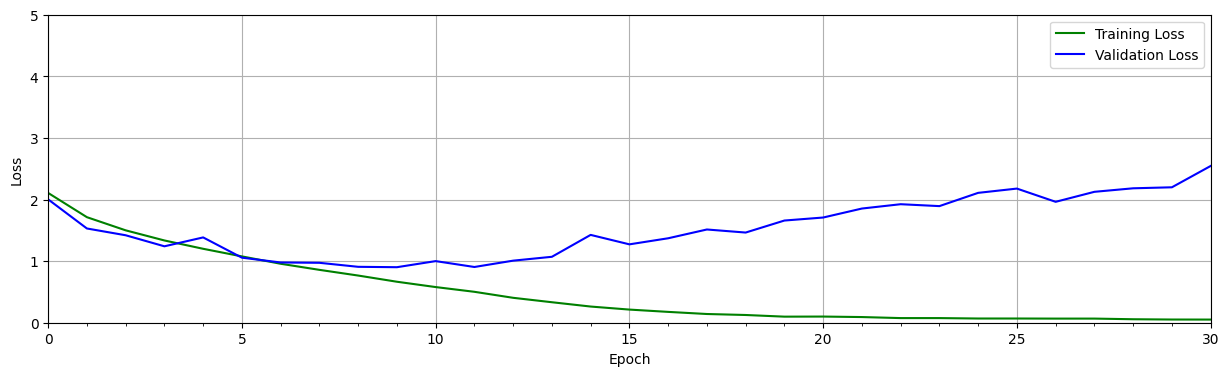

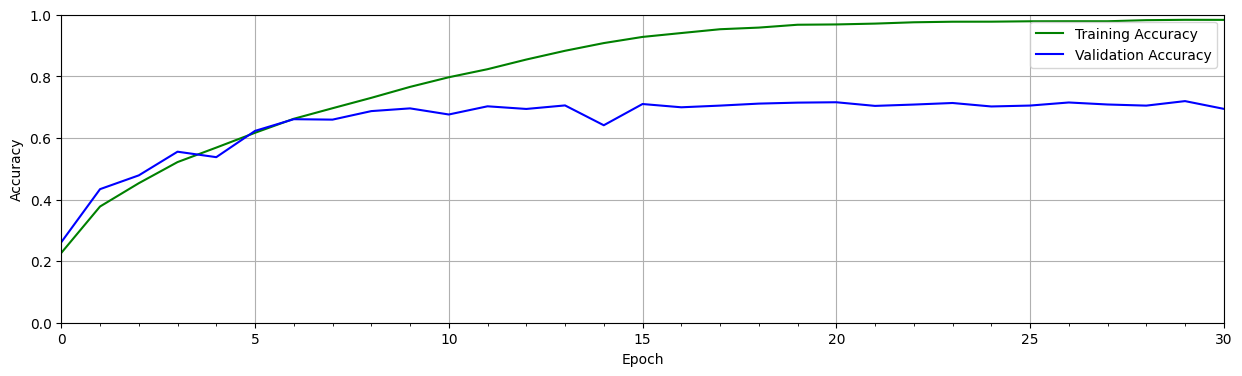

In [19]:
# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results(
    [train_loss, valid_loss],
    ylabel="Loss",
    ylim=[0.0, 5.0],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

plot_results(
    [train_acc, valid_acc],
    ylabel="Accuracy",
    ylim=[0.0, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)

### &rarr; The model is overfitting

---
## 4. Adding `Dropout` to the Model

Dropout is a **regularization** strategy to help the model generalize better.

<img src='https://learnopencv.com/wp-content/uploads/2023/01/tensorflow-keras-cnn-dropout-example.png' width=650 align='center'>

<img src='https://learnopencv.com/wp-content/uploads/2023/01/tensorflow-keras-cnn-dropout-architecture.png' width=900 align='center'>

### 4.1 Define the Model (with Dropout)

In [16]:
def cnn_model_dropout(input_shape=(32, 32, 3)):

    model = Sequential()

    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    #------------------------------------
    # Conv Block 3: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    #------------------------------------
    # Flatten the convolutional features.
    #------------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model

### 4.2 Create the Model (with Dropout)

In [17]:
# Create the model.
model_dropout = cnn_model_dropout()
model_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

### 4.3 Compile the Model (with Dropout)

In [18]:
model_dropout.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

### 4.4 Train the Model (with Dropout)

In [19]:
history = model_dropout.fit(X_train,
                            y_train,
                            batch_size=TrainingConfig.BATCH_SIZE,
                            epochs=TrainingConfig.EPOCHS,
                            verbose=1,
                            validation_split=.3,
                           )

Epoch 1/31
137/137 [==============================] - 7s 32ms/step - loss: 2.1845 - accuracy: 0.2017 - val_loss: 1.9091 - val_accuracy: 0.3152
Epoch 2/31
137/137 [==============================] - 4s 27ms/step - loss: 1.8558 - accuracy: 0.3197 - val_loss: 1.7226 - val_accuracy: 0.3569
Epoch 3/31
137/137 [==============================] - 4s 29ms/step - loss: 1.6478 - accuracy: 0.3981 - val_loss: 1.5888 - val_accuracy: 0.4123
Epoch 4/31
137/137 [==============================] - 4s 28ms/step - loss: 1.5085 - accuracy: 0.4527 - val_loss: 1.3236 - val_accuracy: 0.5090
Epoch 5/31
137/137 [==============================] - 4s 27ms/step - loss: 1.3970 - accuracy: 0.4947 - val_loss: 1.2519 - val_accuracy: 0.5415
Epoch 6/31
137/137 [==============================] - 4s 28ms/step - loss: 1.2914 - accuracy: 0.5359 - val_loss: 1.1546 - val_accuracy: 0.5841
Epoch 7/31
137/137 [==============================] - 4s 31ms/step - loss: 1.1952 - accuracy: 0.5731 - val_loss: 1.1125 - val_accuracy: 0.6067

### 4.5 Plot the Training Results

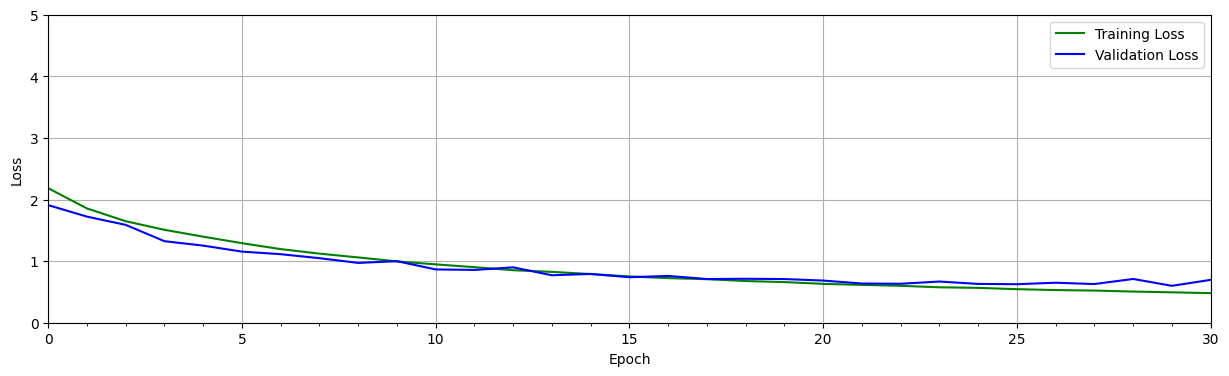

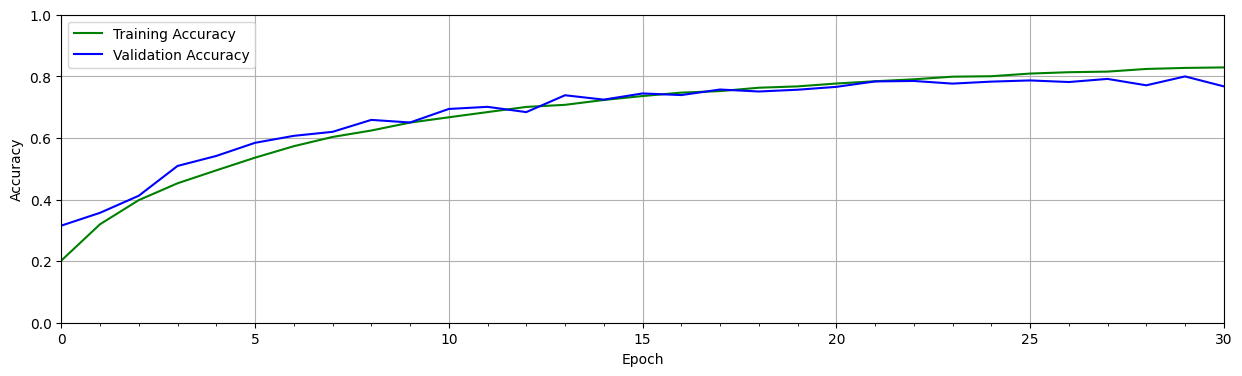

In [20]:
# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results(
    [train_loss, valid_loss],
    ylabel="Loss",
    ylim=[0.0, 5.0],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

plot_results(
    [train_acc, valid_acc],
    ylabel="Accuracy",
    ylim=[0.0, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)

---
## 5. Saving and Loading Models

`save()` method will save the model to the file system in the 'SavedModel' format. This method creates a folder on the file system with the model architecture and training configuration (including the optimizer, losses, and metrics) in `saved_model.pb`. The `variables/` folder contains a standard training checkpoint file that includes the weights of the model.

In [21]:
# Using the save() method, the model will be saved to the file system in the 'SavedModel' format.
model_dropout.save("model_dropout")

In [23]:
from tensorflow.keras import models
reloaded_model_dropout = models.load_model('model_dropout')

---
## 6. Model Evaluation

### 6.1 Evaluate the Model on the Test Dataset

In [24]:
test_loss, test_acc = reloaded_model_dropout.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:.3f}")

313/313 [==============================] - 2s 4ms/step - loss: 0.7007 - accuracy: 0.7671
Test accuracy: 76.710


### 6.2 Make Predictions on Sample Test Images

In [25]:
def evaluate_model(dataset, model):
    class_names = [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
    num_rows = 3
    num_cols = 6

    # Retrieve a number of images from the dataset.
    data_batch = dataset[0 : num_rows * num_cols]

    # Get predictions from model.
    predictions = model.predict(data_batch)

    plt.figure(figsize=(20, 8))
    num_matches = 0

    for idx in range(num_rows * num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx])

        pred_idx = tf.argmax(predictions[idx]).numpy()
        truth_idx = np.nonzero(y_test[idx])

        title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
        title_obj = plt.title(title, fontdict={"fontsize": 13})

        if pred_idx == truth_idx:
            num_matches += 1
            plt.setp(title_obj, color="g")
        else:
            plt.setp(title_obj, color="r")

        acc = num_matches / (idx + 1)
    print("Prediction accuracy: ", int(100 * acc) / 100)

    return

1/1 [==============================] - 0s 361ms/step
Prediction accuracy:  0.88


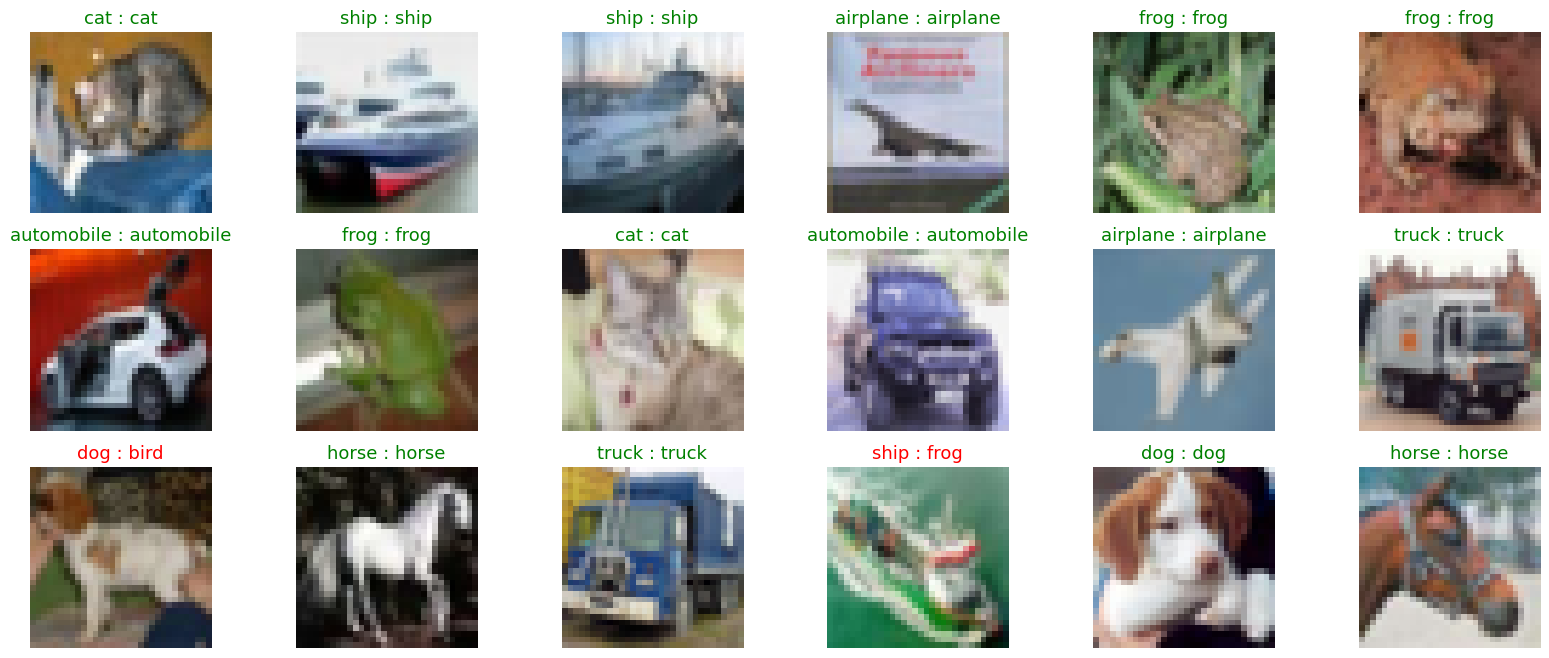

In [26]:
evaluate_model(X_test, reloaded_model_dropout)

### 6.3 Confusion Matrix

In [27]:
# Generate predictions for the test dataset.
predictions = reloaded_model_dropout.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [28]:
# For each sample image in the test dataset, select the class label with the highest probability.
predicted_labels = [np.argmax(i) for i in predictions]

In [29]:
# Convert one-hot encoded labels to integers.
y_test_integer_labels = tf.argmax(y_test, axis=1)

In [30]:
# Generate a confusion matrix for the test dataset.
cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)

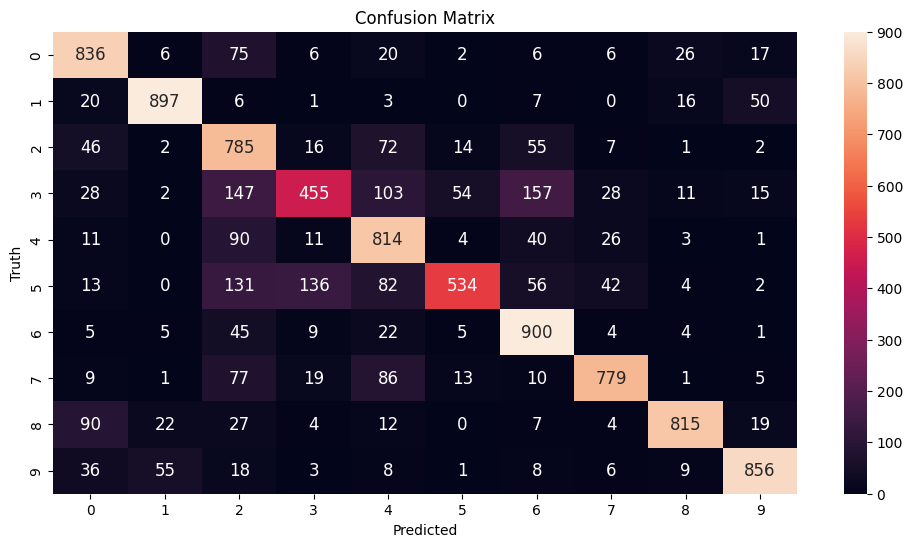

In [31]:
# Plot the confusion matrix as a heatmap.
plt.figure(figsize=[12, 6])
import seaborn as sn

sn.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

---